In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [99]:
#reading in the .csv file
    
tanza_data = pd.read_csv("training.csv")
tanza_data.head() 

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [100]:
#checking for missing values in the dataset
tanza_data.isnull().sum()


ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

**There are no missing values in the dataset in any of the columns in the dataset**

In [101]:
gender = tanza_data.groupby("Q2")
gender["Q2"].describe()

,count,mean,std,min,25%,50%,75%,max
Q2,,,,,,,,
1,3122.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,3972.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0


file= tanza_data.rename(columns={
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Marital Status',
    'Q4': 'Education Highest Level',
    'Q5': 'Ownership Of Land',
    'Q6': 'Land Ownership',
    'Q7': 'Mobile phone ownership',
    'Q8_1': 'Salaries/wages',
    'Q8_2': 'Trading',
    'Q8_3': 'Providing service',
    'Q8_4': 'Casual labour',
    'Q8_5': 'Rental',
    'Q8_6': 'money interest',
    'Q8_7': 'Pension',
    'Q8_8': 'Social welfare',
    'Q8_9': 'Money financially dependant',
    'Q8_10': 'Money no income',
    'Q8_11': 'Other',
    'Q9': 'Salary and wages',
    'Q10': 'Selling goods',
    'Q11': 'Kind of service',
    'Q12': 'Money sent',
    'Q13': 'Last money sent',
    'Q14': 'Money received',
    'Q15': 'Last money received',
    'Q16': 'Mobile money purchases',
    'Q17': 'Mobile money bills',
    'Q18': 'Kwiswhahili literacy',
    'Q19': 'English literacy' 
    
})

Assigning

In [102]:
#total number of females and males interviewed
male = tanza_data[tanza_data['Q2'] == 1]
female = tanza_data[tanza_data['Q2'] == 2]
female.count()

ID                             3972
Q1                             3972
Q2                             3972
Q3                             3972
Q4                             3972
Q5                             3972
Q6                             3972
Q7                             3972
Q8_1                           3972
Q8_2                           3972
Q8_3                           3972
Q8_4                           3972
Q8_5                           3972
Q8_6                           3972
Q8_7                           3972
Q8_8                           3972
Q8_9                           3972
Q8_10                          3972
Q8_11                          3972
Q9                             3972
Q10                            3972
Q11                            3972
Q12                            3972
Q13                            3972
Q14                            3972
Q15                            3972
Q16                            3972
Q17                         

There are 3122 males that were interviewed
There are 3972 females that were interviewed

**GENDER**

Text(0.5, 1.0, "Comparison of all Males' use of Financial Services")

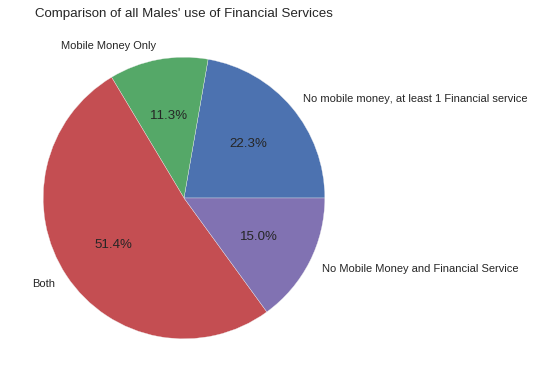

In [103]:
#comparison of males with mobile money and males without mobile money
total_males = len(male[male.mobile_money == 1]) + len(male[male.mobile_money == 0])

l = len(male[male.mobile_money_classification == 1]) / total_males * 100
m = len(male[male.mobile_money_classification == 2]) / total_males * 100
n = len(male[male.mobile_money_classification == 3]) / total_males * 100
o = len(male[male.mobile_money_classification == 0]) / total_males * 100

labels= ['No mobile money, at least 1 Financial service', 'Mobile Money Only', 'Both', 'No Mobile Money and Financial Service']
plt.pie([l, m, n, o], explode=None,autopct='%1.1f%%', labels= labels)
plt.title("Comparison of all Males' use of Financial Services")

Text(0.5, 1.0, "Comparison of all Females' use of financial services")

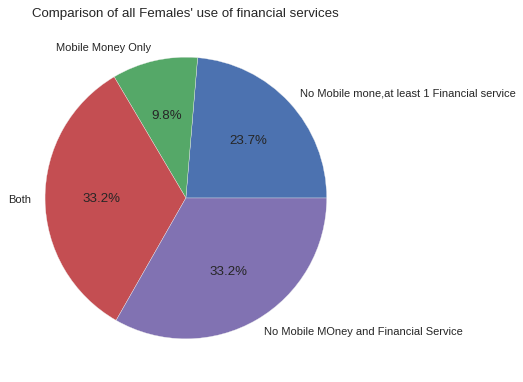

In [104]:
#comparison of females with mobile money and females without mobile money

total_females = len(female[female.mobile_money_classification == 1]) + len(female[female.mobile_money_classification == 2]) + len(female[female.mobile_money_classification == 3])

p = len(female[female.mobile_money_classification == 1]) / total_females * 100
q = len(female[female.mobile_money_classification == 2]) / total_females * 100
r = len(female[female.mobile_money_classification == 3]) / total_females * 100
s = len(female[female.mobile_money_classification == 3]) / total_females * 100
labels= ['No Mobile mone,at least 1 Financial service', 'Mobile Money Only', 'Both', 'No Mobile MOney and Financial Service']
plt.pie([p, q, r, s], explode=None,autopct='%1.1f%%', labels= labels)
plt.title("Comparison of all Females' use of financial services")

**MARITAL STATUSES**

In [105]:
#Seperation of individuals through marital status
married = tanza_data[tanza_data.Q3 == 1]
dirvoced = tanza_data[tanza_data.Q3 == 2]
widowed = tanza_data[tanza_data.Q3 == 3]
single= tanza_data[tanza_data.Q3 == 4]

relation_stat = [married, dirvoced, widowed, single]

In [106]:
relation_stats_none = []
#relation statuses with none
relation_stats_no_mm = []
#relationship statuses with no mobile money with one financial service
relation_stats_mm = []
#relationship statuses with mobile money only
relation_stats_both = []
#relationship statuses with both
for status in relation_stat:
    relation_stats_no_mm.append(len(status[status.mobile_money_classification == 0]))
    relation_stats_mm.append(len(status[status.mobile_money_classification == 1]))
    relation_stats_both.append(len(status[status.mobile_money_classification == 2]))



**TYPES OF INCOME**

In [107]:
#defining the different types of sources of income for Males[male.Q8_8 == 1]
m_wages = male[male.Q8_1 == 1]
m_trading = male[male.Q8_2 == 1]
m_service = male[male.Q8_3 == 1]
m_casual = male[male.Q8_4 == 1]
m_rental = male[male.Q8_5 == 1]
m_interest = male[male.Q8_6 == 1]
m_pension = male[male.Q8_7 == 1]
m_grant = male[male.Q8_8 == 1]
m_handout = male[male.Q8_9 == 1]
m_extpayer = male[male.Q8_10 == 1]


m_sources_of_income = [m_wages, m_trading, m_service, m_casual, m_rental, m_interest, m_pension, m_grant, m_handout, m_extpayer] 


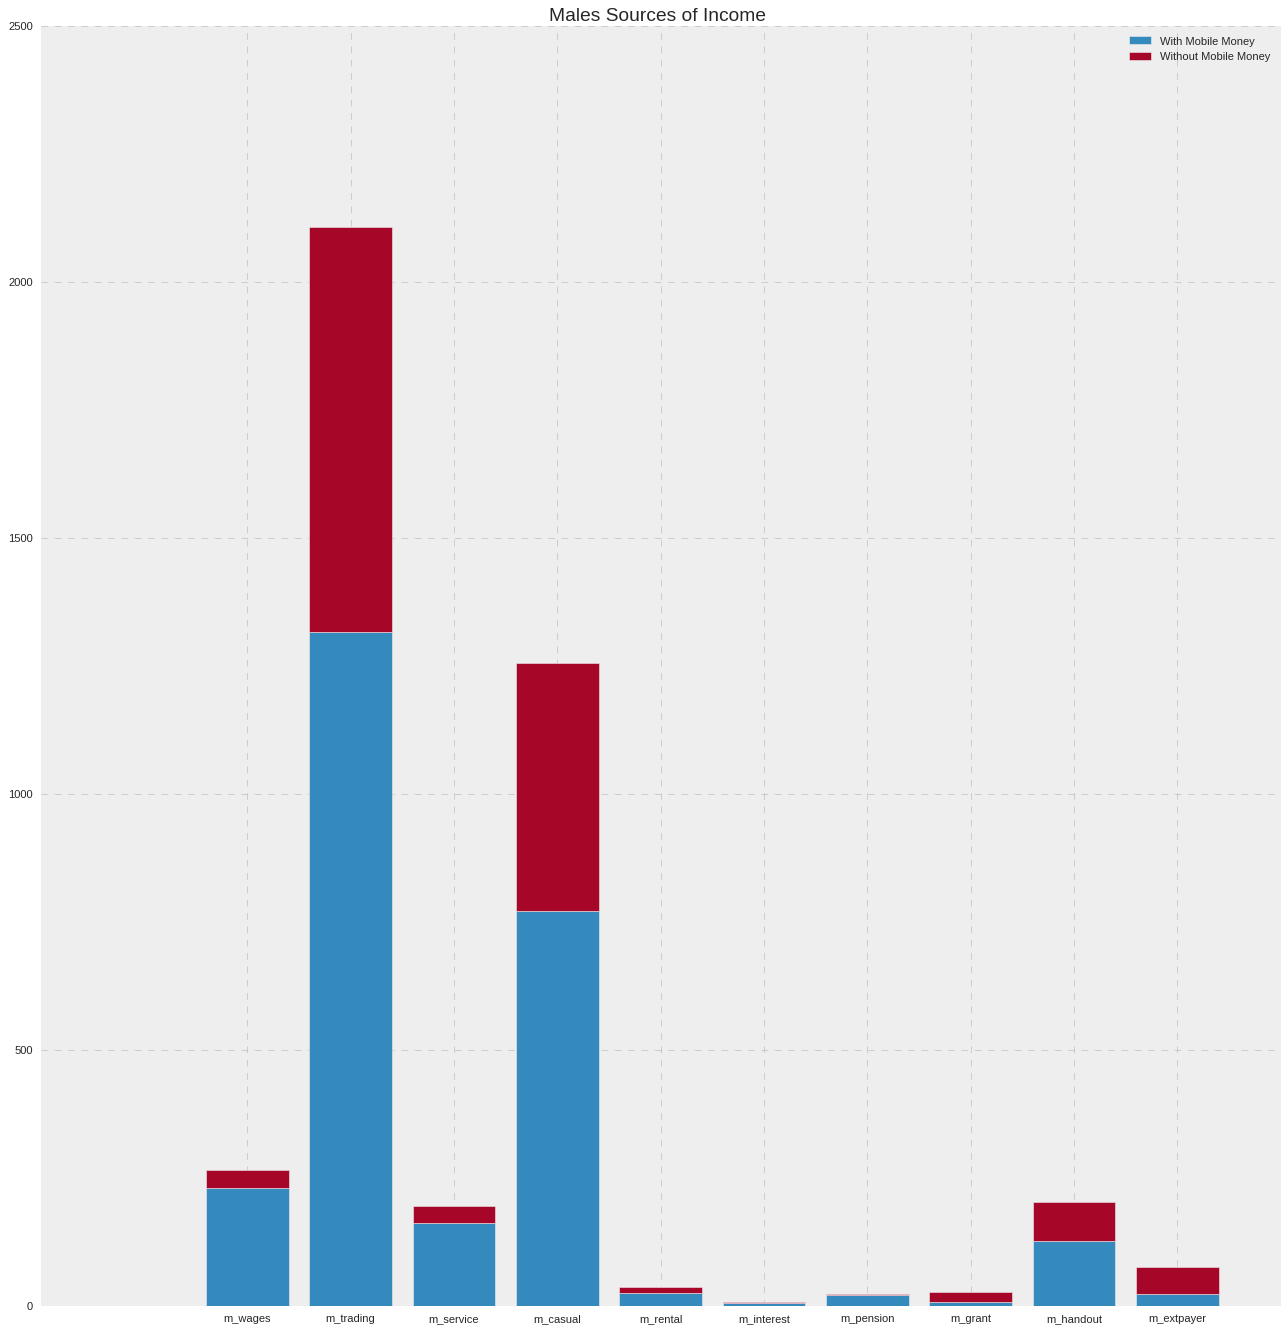

In [108]:
plt.style.use('bmh')
m_sources_mm = []
#Males' souces of income with mobile money
m_sources_no_mm = []
# Males' sources of income without mobile money

for source in m_sources_of_income:
    m_sources_mm.append(len(source[source.mobile_money == 1]))
    m_sources_no_mm.append(len(source[source.mobile_money == 0]))

plt.figure(figsize = (20, 20))
plt.bar(np.arange(10), m_sources_mm, label= 'With Mobile Money')
plt.bar(np.arange(10), m_sources_no_mm, bottom= m_sources_mm, label='Without Mobile Money')
plt.xticks(np.arange(10), ['m_wages', 'm_trading', 'm_service', 'm_casual', 'm_rental', 'm_interest', 'm_pension', 'm_grant','m_handout', 'm_extpayer'])
plt.title("Males Sources of Income ")
plt.legend(loc="upper right")

**WOMEN TYPES OF INCOME**

In [109]:
#defining the different types of sources of income for Females
fm_wages = female[female.Q8_1 == 1]
fm_trading = female[female.Q8_2 == 1]
fm_service = female[female.Q8_3 == 1]
fm_casual = female[female.Q8_4 == 1]
fm_rental = female[female.Q8_5 == 1]
fm_interest = female[female.Q8_6 == 1]
fm_pension = female[female.Q8_7 == 1]
fm_grant = female[female.Q8_8 == 1]
fm_handout = female[female.Q8_9 == 1]
fm_extpayer = female[female.Q8_10 == 1]


fm_sources_of_income = [m_wages, m_trading, m_service, m_casual, m_rental, m_interest, m_pension, m_grant, m_handout, m_extpayer] 


In [110]:
#reationship statuses without mobile money
#defining the different types of sources of income for Males[male.Q8_8 == 1]
m_wages = male[male.Q8_1 == 1]
m_trading = male[male.Q8_2 == 1]
m_service = male[male.Q8_3 == 1]
m_casual = male[male.Q8_4 == 1]
m_rental = male[male.Q8_5 == 1]
m_interest = male[male.Q8_6 == 1]
m_pension = male[male.Q8_7 == 1]
m_grant = male[male.Q8_8 == 1]
m_handout = male[male.Q8_9 == 1]
m_extpayer = male[male.Q8_10 == 1]


m_sources_of_income = [m_wages, m_trading, m_service, m_casual, m_rental, m_interest, m_pension, m_grant, m_handout, m_extpayer] 


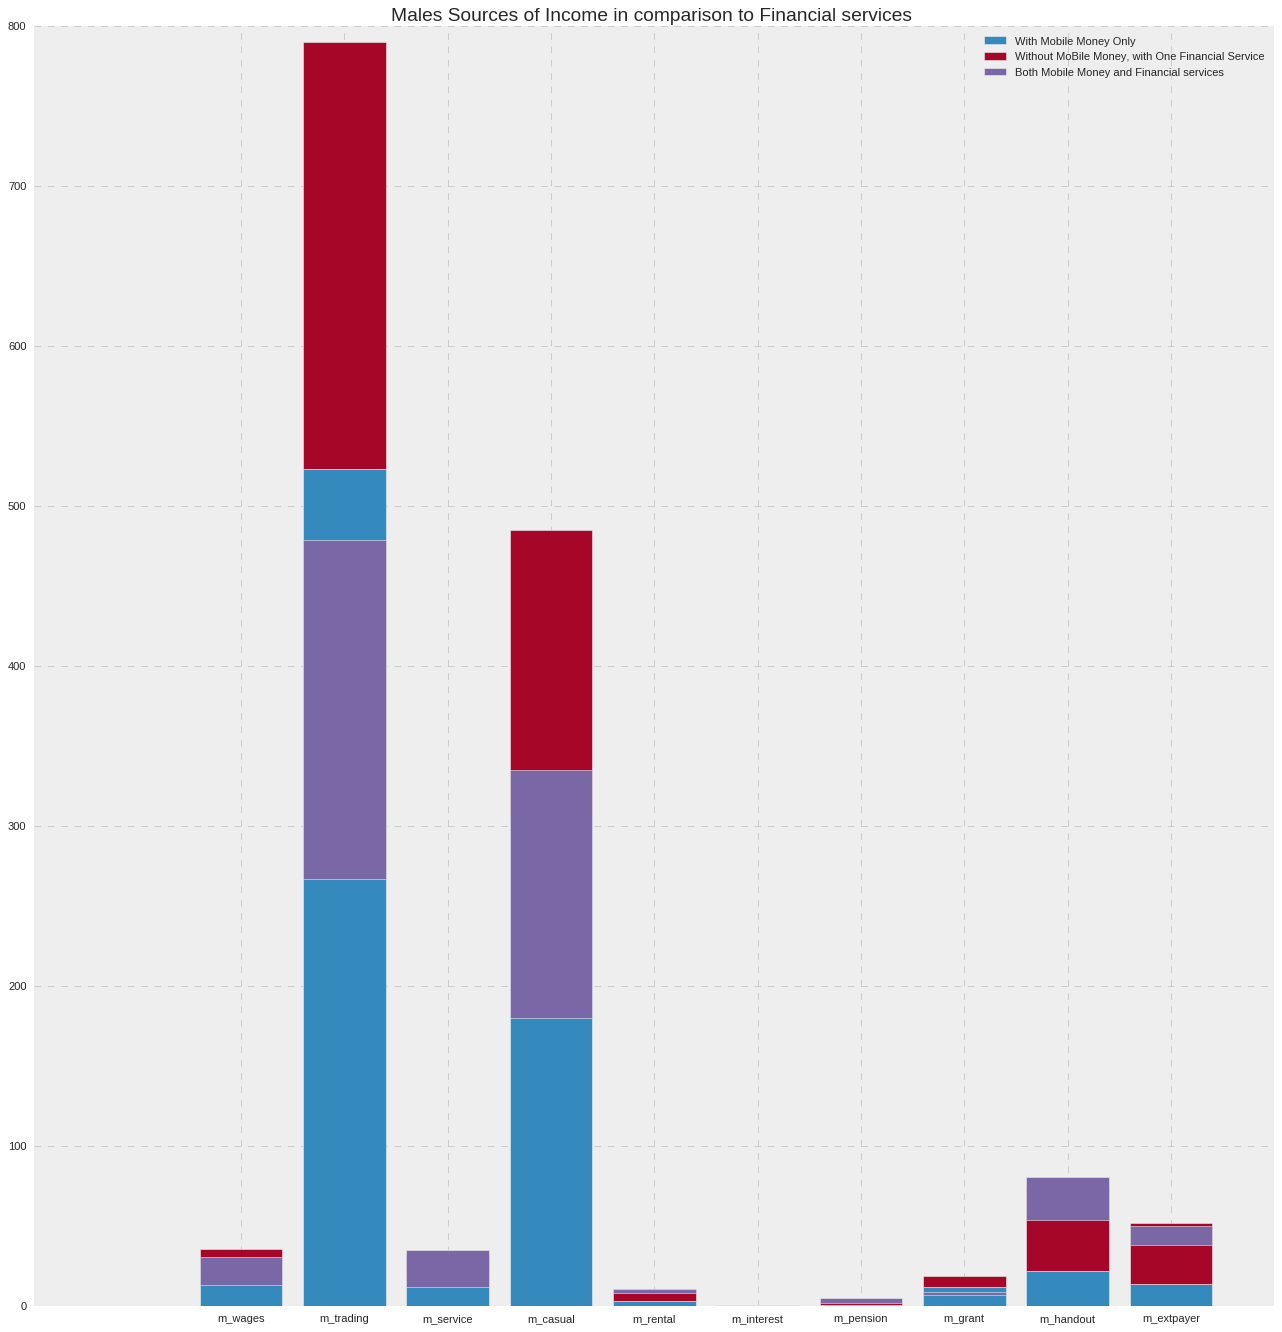

In [111]:
plt.style.use('bmh')
m_sources_mm = []
#Males' souces of income with mobile money only
m_sources_no_mm = []
# Males' sources of income without mobile money but at least one other finacial service
m_sources_both = []
# Males' sources of income with both
for source in m_sources_of_income:
    m_sources_mm.append(len(source[source.mobile_money_classification == 1]))
    m_sources_no_mm.append(len(source[source.mobile_money_classification == 0]))
    m_sources_both.append(len(source[source.mobile_money_classification == 2]))
    
plt.figure(figsize = (20, 20))
plt.bar(np.arange(10), m_sources_mm, label= 'With Mobile Money Only')
plt.bar(np.arange(10), m_sources_no_mm, bottom= m_sources_mm, label='Without MoBile Money, with One Financial Service')
plt.bar(np.arange(10),m_sources_both, bottom=m_sources_no_mm, label='Both Mobile Money and Financial services')
plt.xticks(np.arange(10), ['m_wages', 'm_trading', 'm_service', 'm_casual', 'm_rental', 'm_interest', 'm_pension', 'm_grant','m_handout', 'm_extpayer'])
plt.title("Males Sources of Income in comparison to Financial services ")
plt.legend(loc="upper right")


**FEMALES COMPARISON TO MOBILE CLASSIFICATION**

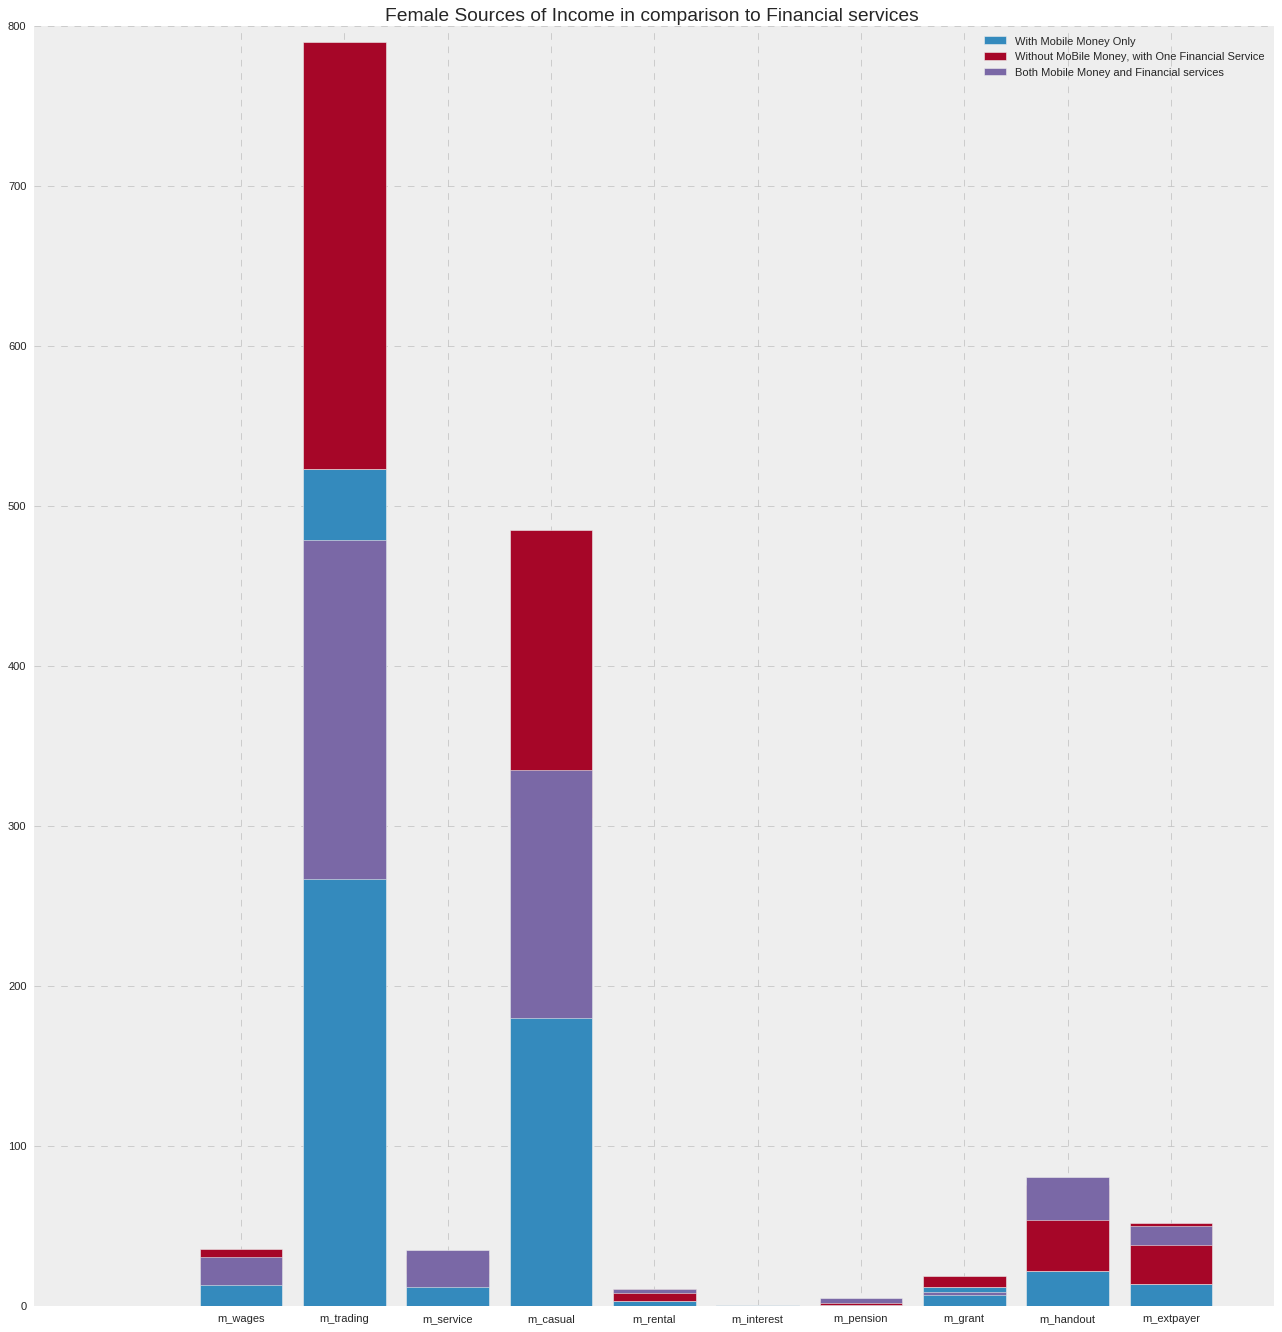

In [112]:
plt.style.use('bmh')
fm_sources_mm = []
#Males' souces of income with mobile money only
fm_sources_no_mm = []
# Males' sources of income without mobile money but at least one other finacial service
fm_sources_both = []
# Males' sources of income with both
for source in m_sources_of_income:
    fm_sources_mm.append(len(source[source.mobile_money_classification == 1]))
    fm_sources_no_mm.append(len(source[source.mobile_money_classification == 0]))
    fm_sources_both.append(len(source[source.mobile_money_classification == 2]))
    
plt.figure(figsize = (20, 20))
plt.bar(np.arange(10), fm_sources_mm, label= 'With Mobile Money Only')
plt.bar(np.arange(10), fm_sources_no_mm, bottom= fm_sources_mm, label='Without MoBile Money, with One Financial Service')
plt.bar(np.arange(10), fm_sources_both, bottom=fm_sources_no_mm, label='Both Mobile Money and Financial services')
plt.xticks(np.arange(10), ['m_wages', 'm_trading', 'm_service', 'm_casual', 'm_rental', 'm_interest', 'm_pension', 'm_grant','m_handout', 'm_extpayer'])
plt.title("Female Sources of Income in comparison to Financial services ")
plt.legend(loc="upper right")


**AGE**

Text(0.5, 1, 'Age in Comparison to Mobile money Classification')

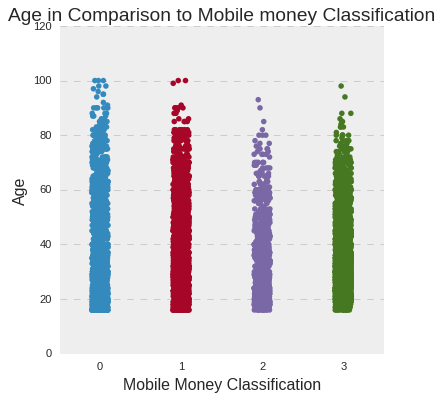

In [113]:
sns.catplot(x= 'mobile_money_classification', y='Q1', data= tanza_data)
plt.xlabel("Mobile Money Classification")
plt.ylabel("Age")
plt.title('Age in Comparison to Mobile money Classification')

**ppropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.



In [114]:
#Q16 and Q17 deal with how often interviwees used mobile money in the past 
# definig the categories to how ofteen its been ued for the past 12 months

#not_app = tanza_data[tanza_data.Q16 == -1] + tanza_data[tanza_data.Q.17]
#not_app


In [115]:
freq_of_use = tanza_data.groupby("Q16")
freq_of_use["Q16"].describe()



,count,mean,std,min,25%,50%,75%,max
Q16,,,,,,,,
1,5089.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,77.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,248.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
4,543.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
5,1137.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0


In [116]:
freq_of_use1 = tanza_data.groupby("Q17")
freq_of_use1.describe()

ID                                                                    \
      count         mean          std   min      25%     50%      75%     max   
Q17                                                                             
-1   6025.0  4936.770788  2621.265378   1.0  2753.00  4957.0  7193.00  9459.0   
 1    460.0  3584.745652  2934.438686   5.0   799.50  2901.0  6075.75  9385.0   
 2     23.0   661.478261   782.854269  11.0   197.50   413.0   696.00  3578.0   
 3     58.0  2704.413793  3092.608960   2.0   336.25  1091.5  4433.50  9401.0   
 4    359.0  3806.891365  3068.927582   4.0  1067.00  2761.0  6617.50  9386.0   
 5    169.0  4215.544379  3276.681549   3.0  1249.00  3253.0  7649.00  9380.0   

         Q1             ... insurance      mobile_money_classification  \
      count       mean  ...       75%  max                       count   
Q17                     ...                                              
-1   6025.0  38.254772  ...       0.0  1.0                      6025.0   
 1    460.0  39.619565  ...       0.0  1.0                       460.0   
 2     23.0  35.695652  ...       1.0  1.0                        23.0   
 3     58.0  34.500000  ...       1.0  1.0                        58.0   
 4    359.0  37.256267  ...       1.0  1.0                       359.0   
 5    169.0  37.656805  ...       1.0  1.0                       169.0   

                                                  
         mean       std  min  25%  50%  75%  max  
Q17                                               
-1   1.674689  1.194025  0.0  1.0  2.0  3.0  3.0  
 1   1.986957  1.202686  0.0  1.0  3.0  3.0  3.0  
 2   2.913043  0.288104  2.0  3.0  3.0  3.0  3.0  
 3   2.896552  0.307203  2.0  3.0  3.0  3.0  3.0  
 4   2.896936  0.339185  1.0  3.0  3.0  3.0  3.0  
 5   2.869822  0.401901  0.0  3.0  3.0  3.0  3.0  

[6 rows x 288 columns]

Text(0.5, 1, 'Land Ownership in Comparison to Mobile money Classification')

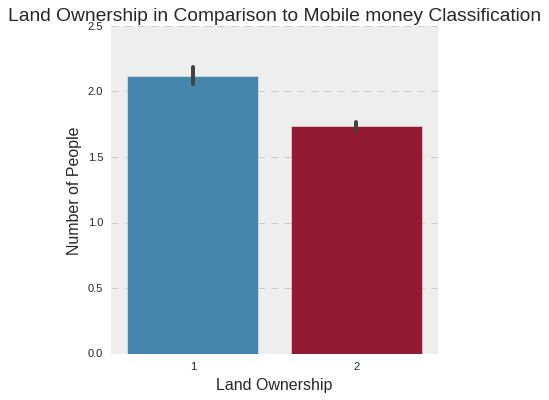

In [118]:
# A
sns.catplot(x= 'Q6', y= 'mobile_money_classification', kind= 'bar', data= tanza_data)
plt.xlabel("Land Ownership")
plt.ylabel('Number of People')
plt.title('Land Ownership in Comparison to Mobile money Classification')

In [66]:
#defining totals of frequency 

m_never = len(tanza_data[tanza_data[""] == 1])+ len(tanza_data[tanza_data["Q17"] == 1])
daily = len(tanza_data[tanza_data["Q16"] == 2])+ len(tanza_data[tanza_data["Q17"] == 2])
weekly = len(tanza_data[tanza_data["Q16"] == 3]) + len(tanza_data[tanza_data["Q17"] == 3])
monthly = len(tanza_data[tanza_data["Q16"] == 4]) + len(tanza_data[tanza_data["Q17"] == 4])
not_often = len(tanza_data[tanza_data["Q16"] == 5]) + len(tanza_data[tanza_data["Q17"] == 5])

how_often = [m_never, daily, weekly, monthly, not_often] 

KeyError: ''

In [88]:
file= tanza_data.rename(columns={
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Marital status',
    'Q4': 'Education Highest Level',
    'Q5': 'Ownership Of Land',
    'Q6': 'Land Ownership',
    'Q7': 'Mobile phone ownership',
    'Q8_1': 'Wages',
    'Q8_2': 'Trading',
    'Q8_3': 'Providing service',
    'Q8_4': 'Casual labour',
    'Q8_5': 'Rental',
    'Q8_6': 'money interest',
    'Q8_7': 'Pension',
    'Q8_8': 'Social welfare',
    'Q8_9': 'Money financially dependant',
    'Q8_10': 'Money no income',
    'Q8_11': 'Other',
    'Q9': 'Salary and wages',
    'Q10': 'Selling goods',
    'Q11': 'Kind of service',
    'Q12': 'Money sent',
    'Q13': 'Last money sent',
    'Q14': 'Money received',
    'Q15': 'Last money received',
    'Q16': 'Mobile money purchases',
    'Q17': 'Mobile money bills',
    'Q18': 'Kwiswhahili literacy',
    'Q19': 'English literacy' 
    
}, inplace=True
                       )

In [89]:
tanza_data.head()

,ID,Age,Gender,Marital status,Education Highest Level,Ownership Of Land,Land Ownership,Mobile phone ownership,Wages,Trading,...,Mobile money bills,Kwiswhahili literacy,English literacy,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [90]:
marital_stat = {1:'Married', 2:'Divorced', 3:'Widowed', 4:'Single'}
tanza_data['Marital status'] = tanza_data['Marital status'].map(marital_stat)

gender = {1:'Male', 2:'Female'}
tanza_data['Gender'] = tanza_data['Gender'].map(gender)

mm_classification = {0:'None', 1:'MM_Plus', 2:'MM_Only', 3:'Other_Only'}
tanza_data['mobile_money_classification'] = tanza_data['mobile_money_classification'].map(mm_classification)

l_ownership = {1:'Yes', 2:'No'}
tanza_data['Land Ownership'] = tanza_data['Land Ownership'].map(l_ownership)

trading = {0:'No', 1:'Yes'}
tanza_data['Trading'] = tanza_data['Trading'].map(trading)

services = {0:'No', 1:'Yes'}
tanza_data['Providing service'] = tanza_data['Providing service'].map(services)

casual= {0:'No', 1:'Yes'}
tanza_data['Casual labour'] = tanza_data['Casual labour'].map(casual)

rent_income = {0:'No', 1:'Yes'}
tanza_data['Rental'] = tanza_data['Rental'].map(rent_income)

interest = {0:'No', 1:'Yes'}
tanza_data['money interest'] = tanza_data['money interest'].map(interest)

pension = {0:'No', 1:'Yes'}
tanza_data['Pension'] = tanza_data['Pension'].map(pension)

social_welfare= {1:'Yes', 0:'No'}
tanza_data['Social welfare'] = tanza_data['Social welfare'].map(social_welfare)

financially_dependant = {1:'Yes', 0:'No'}
tanza_data['Money financially dependant'] = tanza_data['Money financially dependant'].map(financially_dependant)

no_income = {0:'No', 1:'Yes'}
tanza_data['Money no income'] = tanza_data['Money no income'].map(no_income)

other_income= {0:'No', 1:'Yes'}
tanza_data['Other'] = tanza_data['Other'].map(other_income)

money_sent= {1:'Yes', 2:'No'}
tanza_data['Money sent'] = tanza_data['Money sent'].map(money_sent)

money_last_sent= {-1:'N/A', 4:'90 days', 2:'7 days', 5:'less than 6months', 3:'30 days', 6:'more than 6months', 1:'Yesterday/today'}
tanza_data['Last money sent'] = tanza_data['Last money sent'].map(money_last_sent)

money_received= {1:'Yes', 2:'No'}
tanza_data['Money received'] = tanza_data['Money received'].map(money_received)

last_money_received= {-1:'N/A', 1:'Never', 2:'Daily', 3:'Weekly', 4:'Monthly', 5:'less often than monthly'}
tanza_data['Last money received'] = tanza_data['Last money received'].map(last_money_received)

mm_purchases = {-1:'N/A', 1:'Never', 2:'Daily', 3:'Weekly', 4:'Monthly', 5:'less often than monthly'}
tanza_data['Mobile money purchases'] = tanza_data['Mobile money purchases'].map(mm_purchases)

mm_bills= {-1:'N/A', 1:'Never', 2:'Daily', 3:'Weekly', 4:'Monthly', 5:'less often than monthly'}
tanza_data['Mobile money bills'] = tanza_data['Mobile money bills'].map(mm_bills)



Text(0.5, 1, 'How often mobile money is used for purchases')

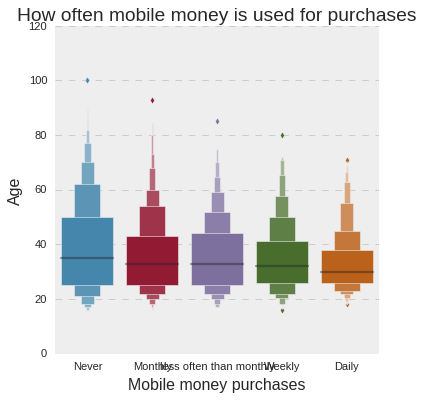

In [91]:
#How often mobile money is used for purchases and age
sns.catplot(x= 'Mobile money purchases', y= 'Age',kind= 'boxen', data= tanza_data)
plt.title('How often mobile money is used for purchases' )

Text(0.5, 1, 'How often mobile money is used for bills')

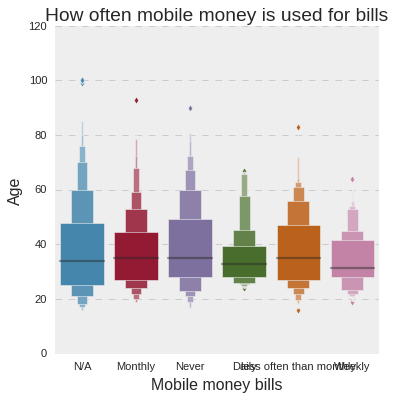

In [92]:
#how often mobile money is used for bills and age
sns.catplot(x= 'Mobile money bills', y= 'Age',kind= 'boxen', data= tanza_data)
plt.ylabel('How often mobile money is used')
plt.title('How often mobile money is used for bills')

In [93]:
sns.catplot(x='',kind= 'count', hue= 'gender', data= tanza_data)
plt.xlabel("Land Ownership")
plt.ylabel('Number of People')
plt.title('Age in Comparison to Mobile money Classification')

ValueError: Could not interpret input ''